## Table of Contents
1. 🔗[Import libraries](#🔗Import)
2. 🔍[Reading Data](#🔍Reading-Data)
3. 📈[Exploratory Data Analysis (EDA)](#📈EDA)
4. 🏗️[Feature Engineering](#🏗️Feature-Engineering)
5. 🤖[Model Building](#🤖Model-Building)
6. 📊[Evaluation](#📊Evaluation)

| #      | Feature      | Description                                                                                   |
| ------ | ------------ | --------------------------------------------------------------------------------------------- |
| **1**  | `school`     | Student's school (binary): `'GP'` = Gabriel Pereira, `'MS'` = Mousinho da Silveira            |
| **2**  | `sex`        | Student's sex (binary): `'F'` = female, `'M'` = male                                          |
| **3**  | `age`        | Student's age (numeric): 15 to 22                                                             |
| **4**  | `address`    | Home address type (binary): `'U'` = urban, `'R'` = rural                                      |
| **5**  | `famsize`    | Family size (binary): `'LE3'` = ≤3, `'GT3'` = >3                                              |
| **6**  | `Pstatus`    | Parent cohabitation status (binary): `'T'` = together, `'A'` = apart                          |
| **7**  | `Medu`       | Mother's education (0–4): 0 = none, 1 = primary (4th), 2 = 5th–9th, 3 = secondary, 4 = higher |
| **8**  | `Fedu`       | Father's education (same scale as `Medu`)                                                     |
| **9**  | `Mjob`       | Mother's job (nominal): `'teacher'`, `'health'`, `'services'`, `'at_home'`, `'other'`         |
| **10** | `Fjob`       | Father's job (same categories as `Mjob`)                                                      |
| **11** | `reason`     | Reason for school choice: `'home'`, `'reputation'`, `'course'`, `'other'`                     |
| **12** | `guardian`   | Student's guardian: `'mother'`, `'father'`, `'other'`                                         |
| **13** | `traveltime` | Home-to-school travel time (1–4): 1 = <15 min, 4 = >1 hour                                    |
| **14** | `studytime`  | Weekly study time (1–4): 1 = <2 hrs, 4 = >10 hrs                                              |
| **15** | `failures`   | Number of past class failures (0–3, 4 = 3+)                                                   |
| **16** | `schoolsup`  | Extra educational support (binary): `'yes'` or `'no'`                                         |
| **17** | `famsup`     | Family educational support (binary): `'yes'` or `'no'`                                        |
| **18** | `paid`       | Extra paid classes (Math/Portuguese) (binary)                                                 |
| **19** | `activities` | Extra-curricular activities (binary)                                                          |
| **20** | `nursery`    | Attended nursery school (binary)                                                              |
| **21** | `higher`     | Aspires for higher education (binary)                                                         |
| **22** | `internet`   | Internet access at home (binary)                                                              |
| **23** | `romantic`   | In a romantic relationship (binary)                                                           |
| **24** | `famrel`     | Family relationship quality (1–5)                                                             |
| **25** | `freetime`   | Free time after school (1–5)                                                                  |
| **26** | `goout`      | Going out with friends frequency (1–5)                                                        |
| **27** | `Dalc`       | Workday alcohol consumption (1–5)                                                             |
| **28** | `Walc`       | Weekend alcohol consumption (1–5)                                                             |
| **29** | `health`     | Current health status (1–5)                                                                   |
| **30** | `absences`   | Number of school absences (0–93)                                                              |

## 🔗Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## 🔍Reading-Data

In [2]:
df = pd.read_csv("/kaggle/input/math-students/student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 📈EDA

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


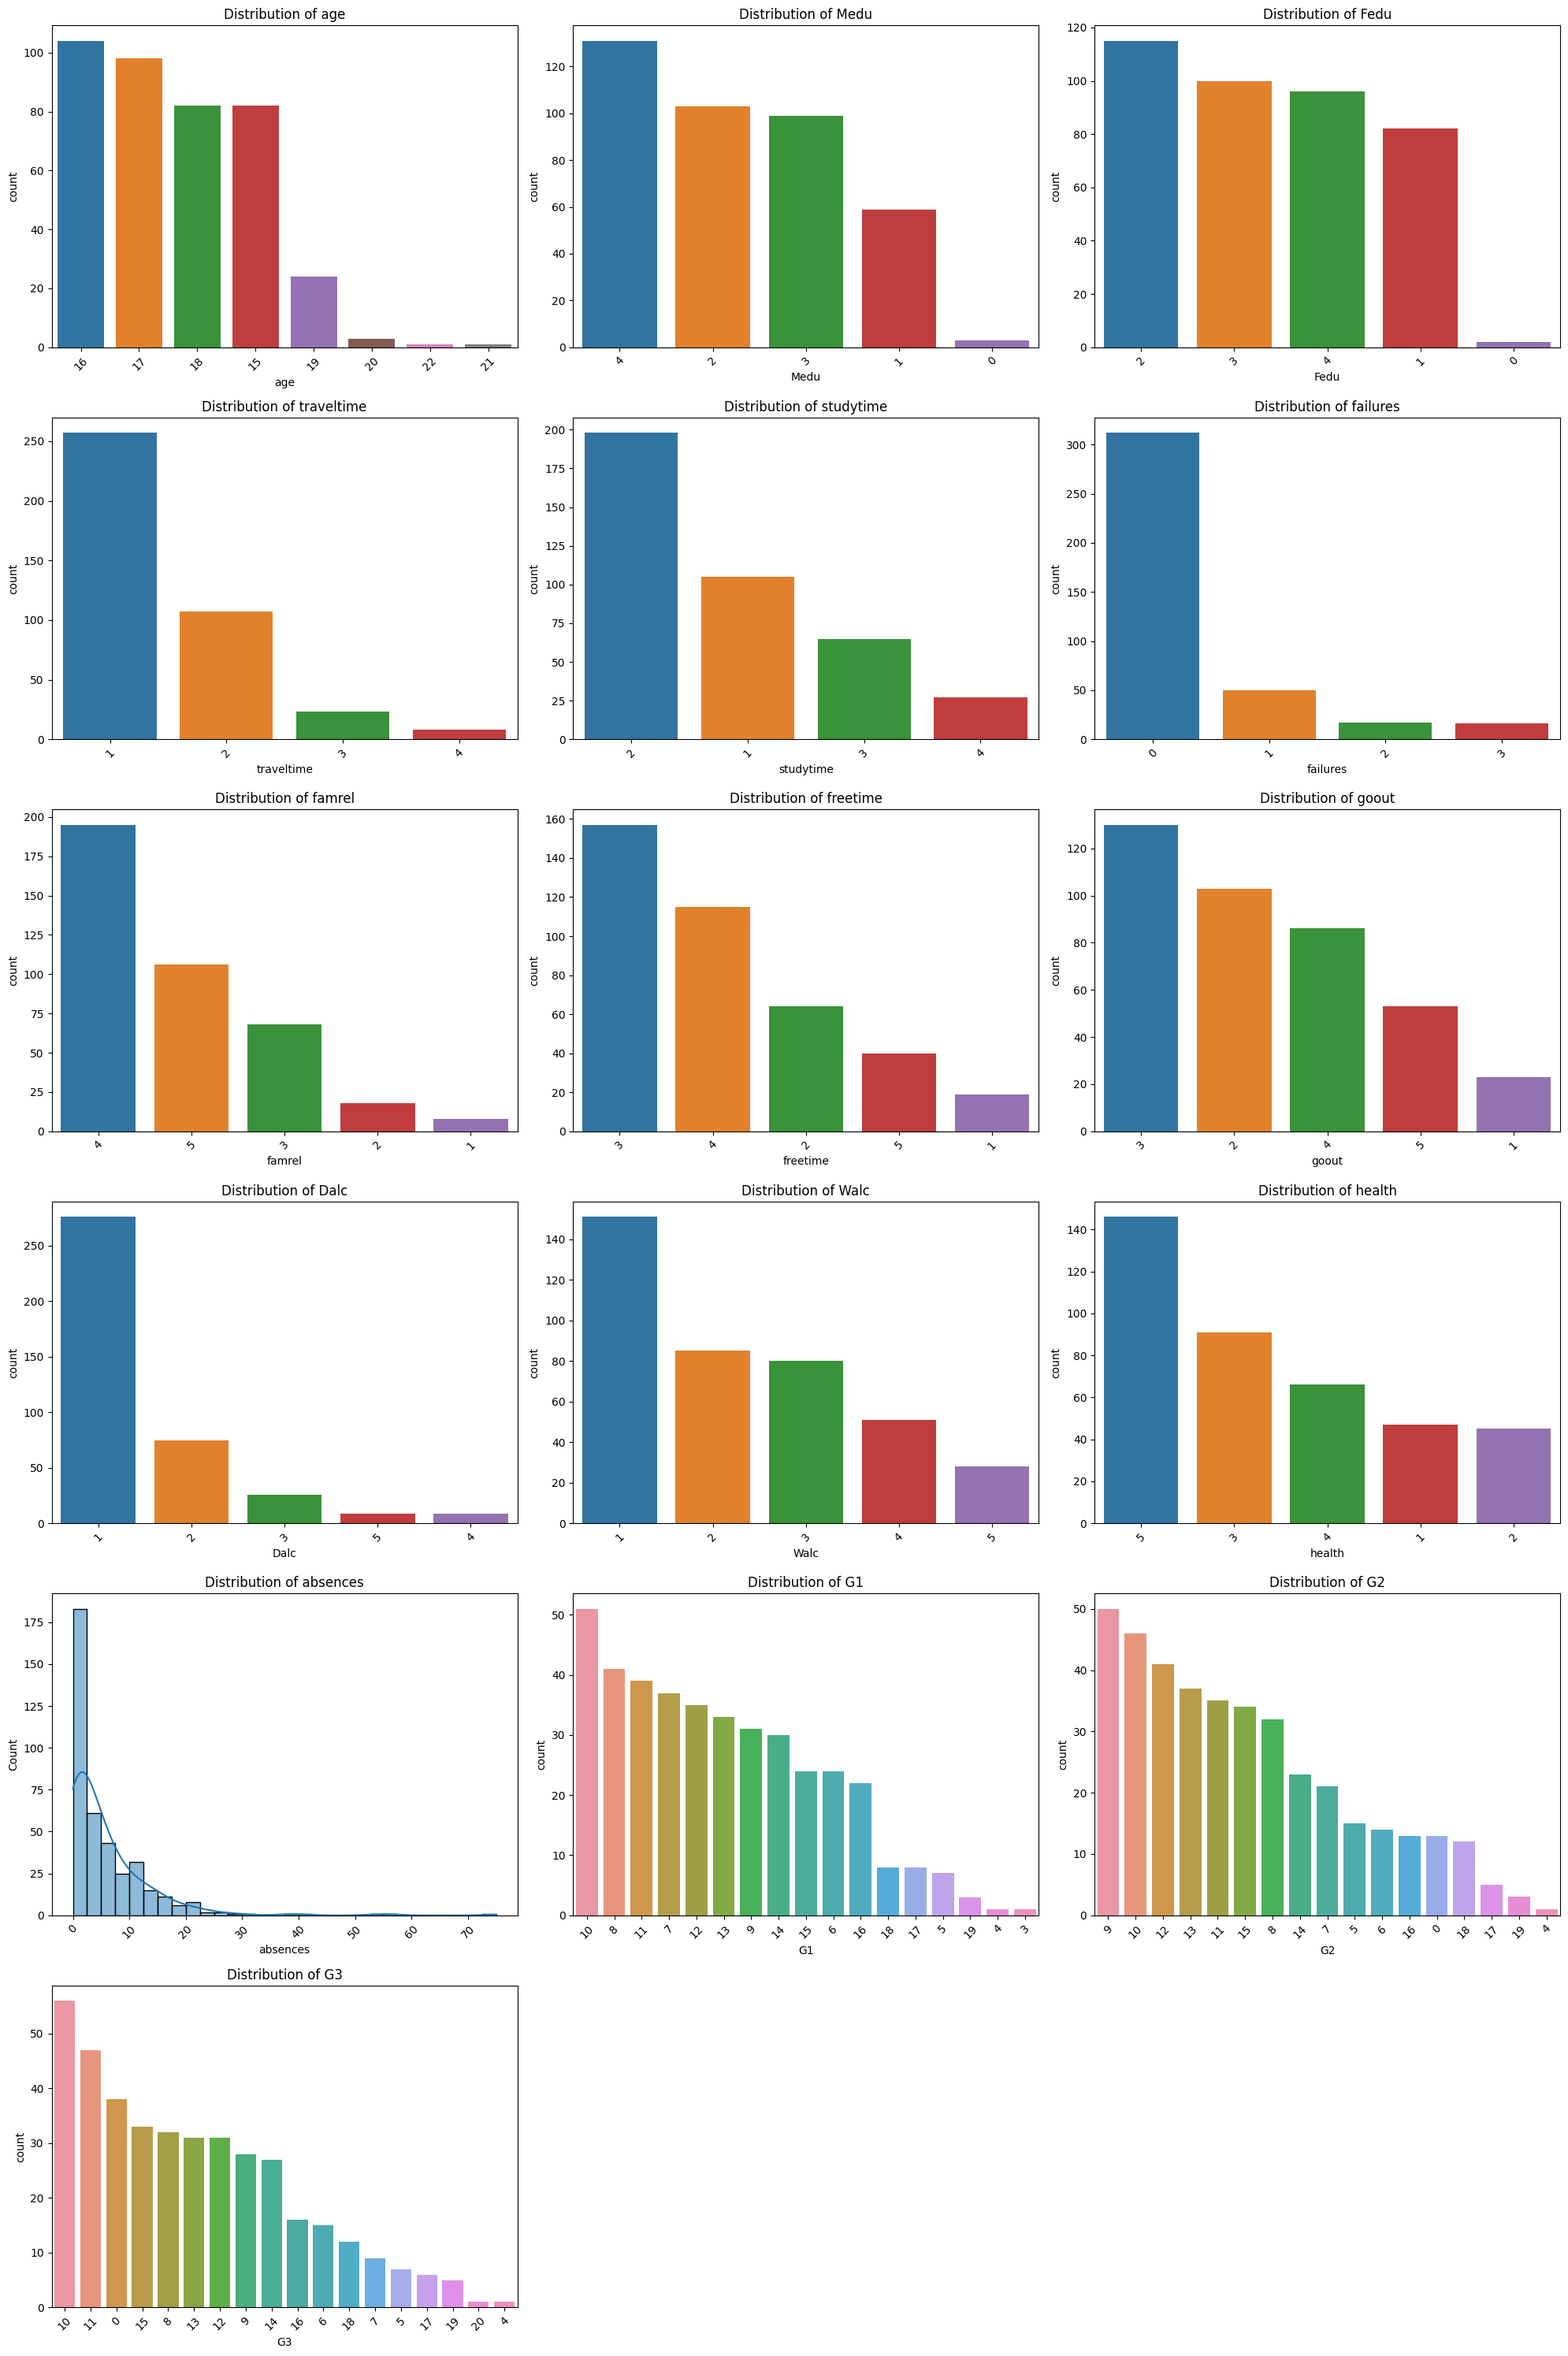

In [6]:
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

# Limit to 10 features if there are more than 10
# if len(numeric_cols) > 10:
#     numeric_cols = numeric_cols[:10]

# Calculate the number of rows needed (3 plots per row)
n_rows = (len(numeric_cols) + 2) // 3  # Round up division

# Create subplots (3 per row)
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(numeric_cols):
    if df[col].nunique() < 20:  # Treat as discrete
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])
    else:  # Treat as continuous
        sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if total plots not multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

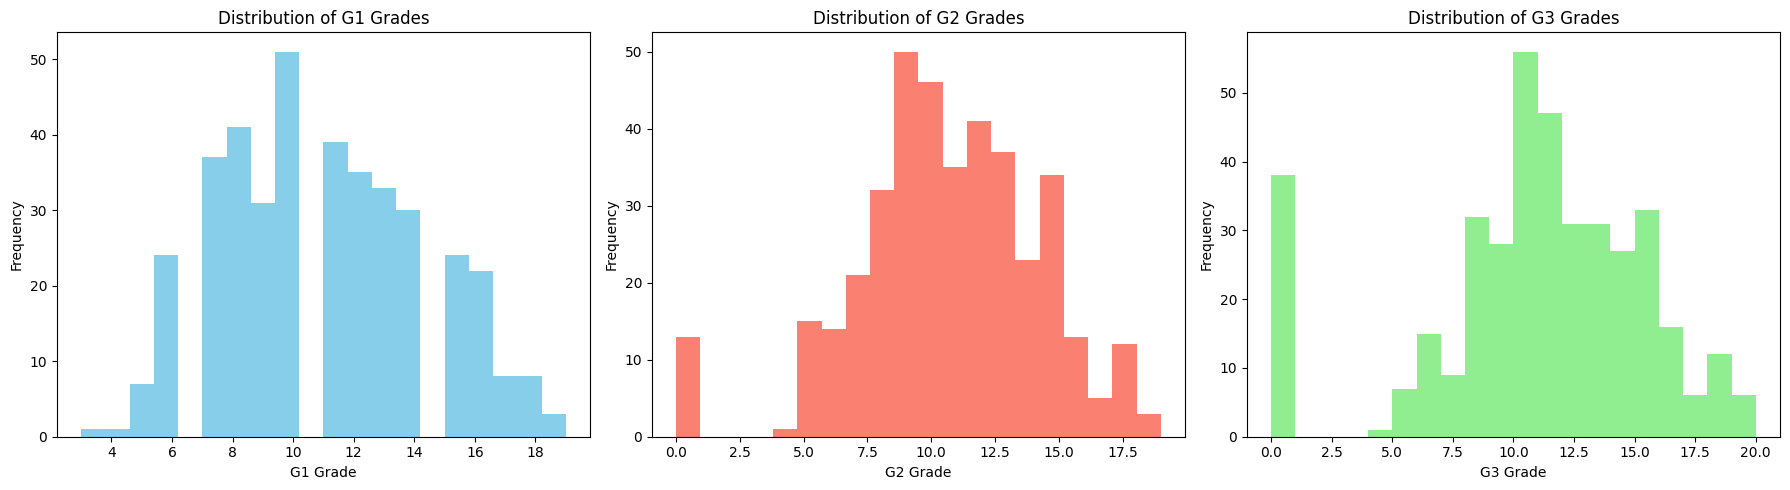

In [7]:
# Plotting histograms for G1, G2, and G3 grades
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(df['G1'], bins=20, color='skyblue')
plt.title('Distribution of G1 Grades')
plt.xlabel('G1 Grade')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['G2'], bins=20, color='salmon')
plt.title('Distribution of G2 Grades')
plt.xlabel('G2 Grade')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['G3'], bins=20, color='lightgreen')
plt.title('Distribution of G3 Grades')
plt.xlabel('G3 Grade')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

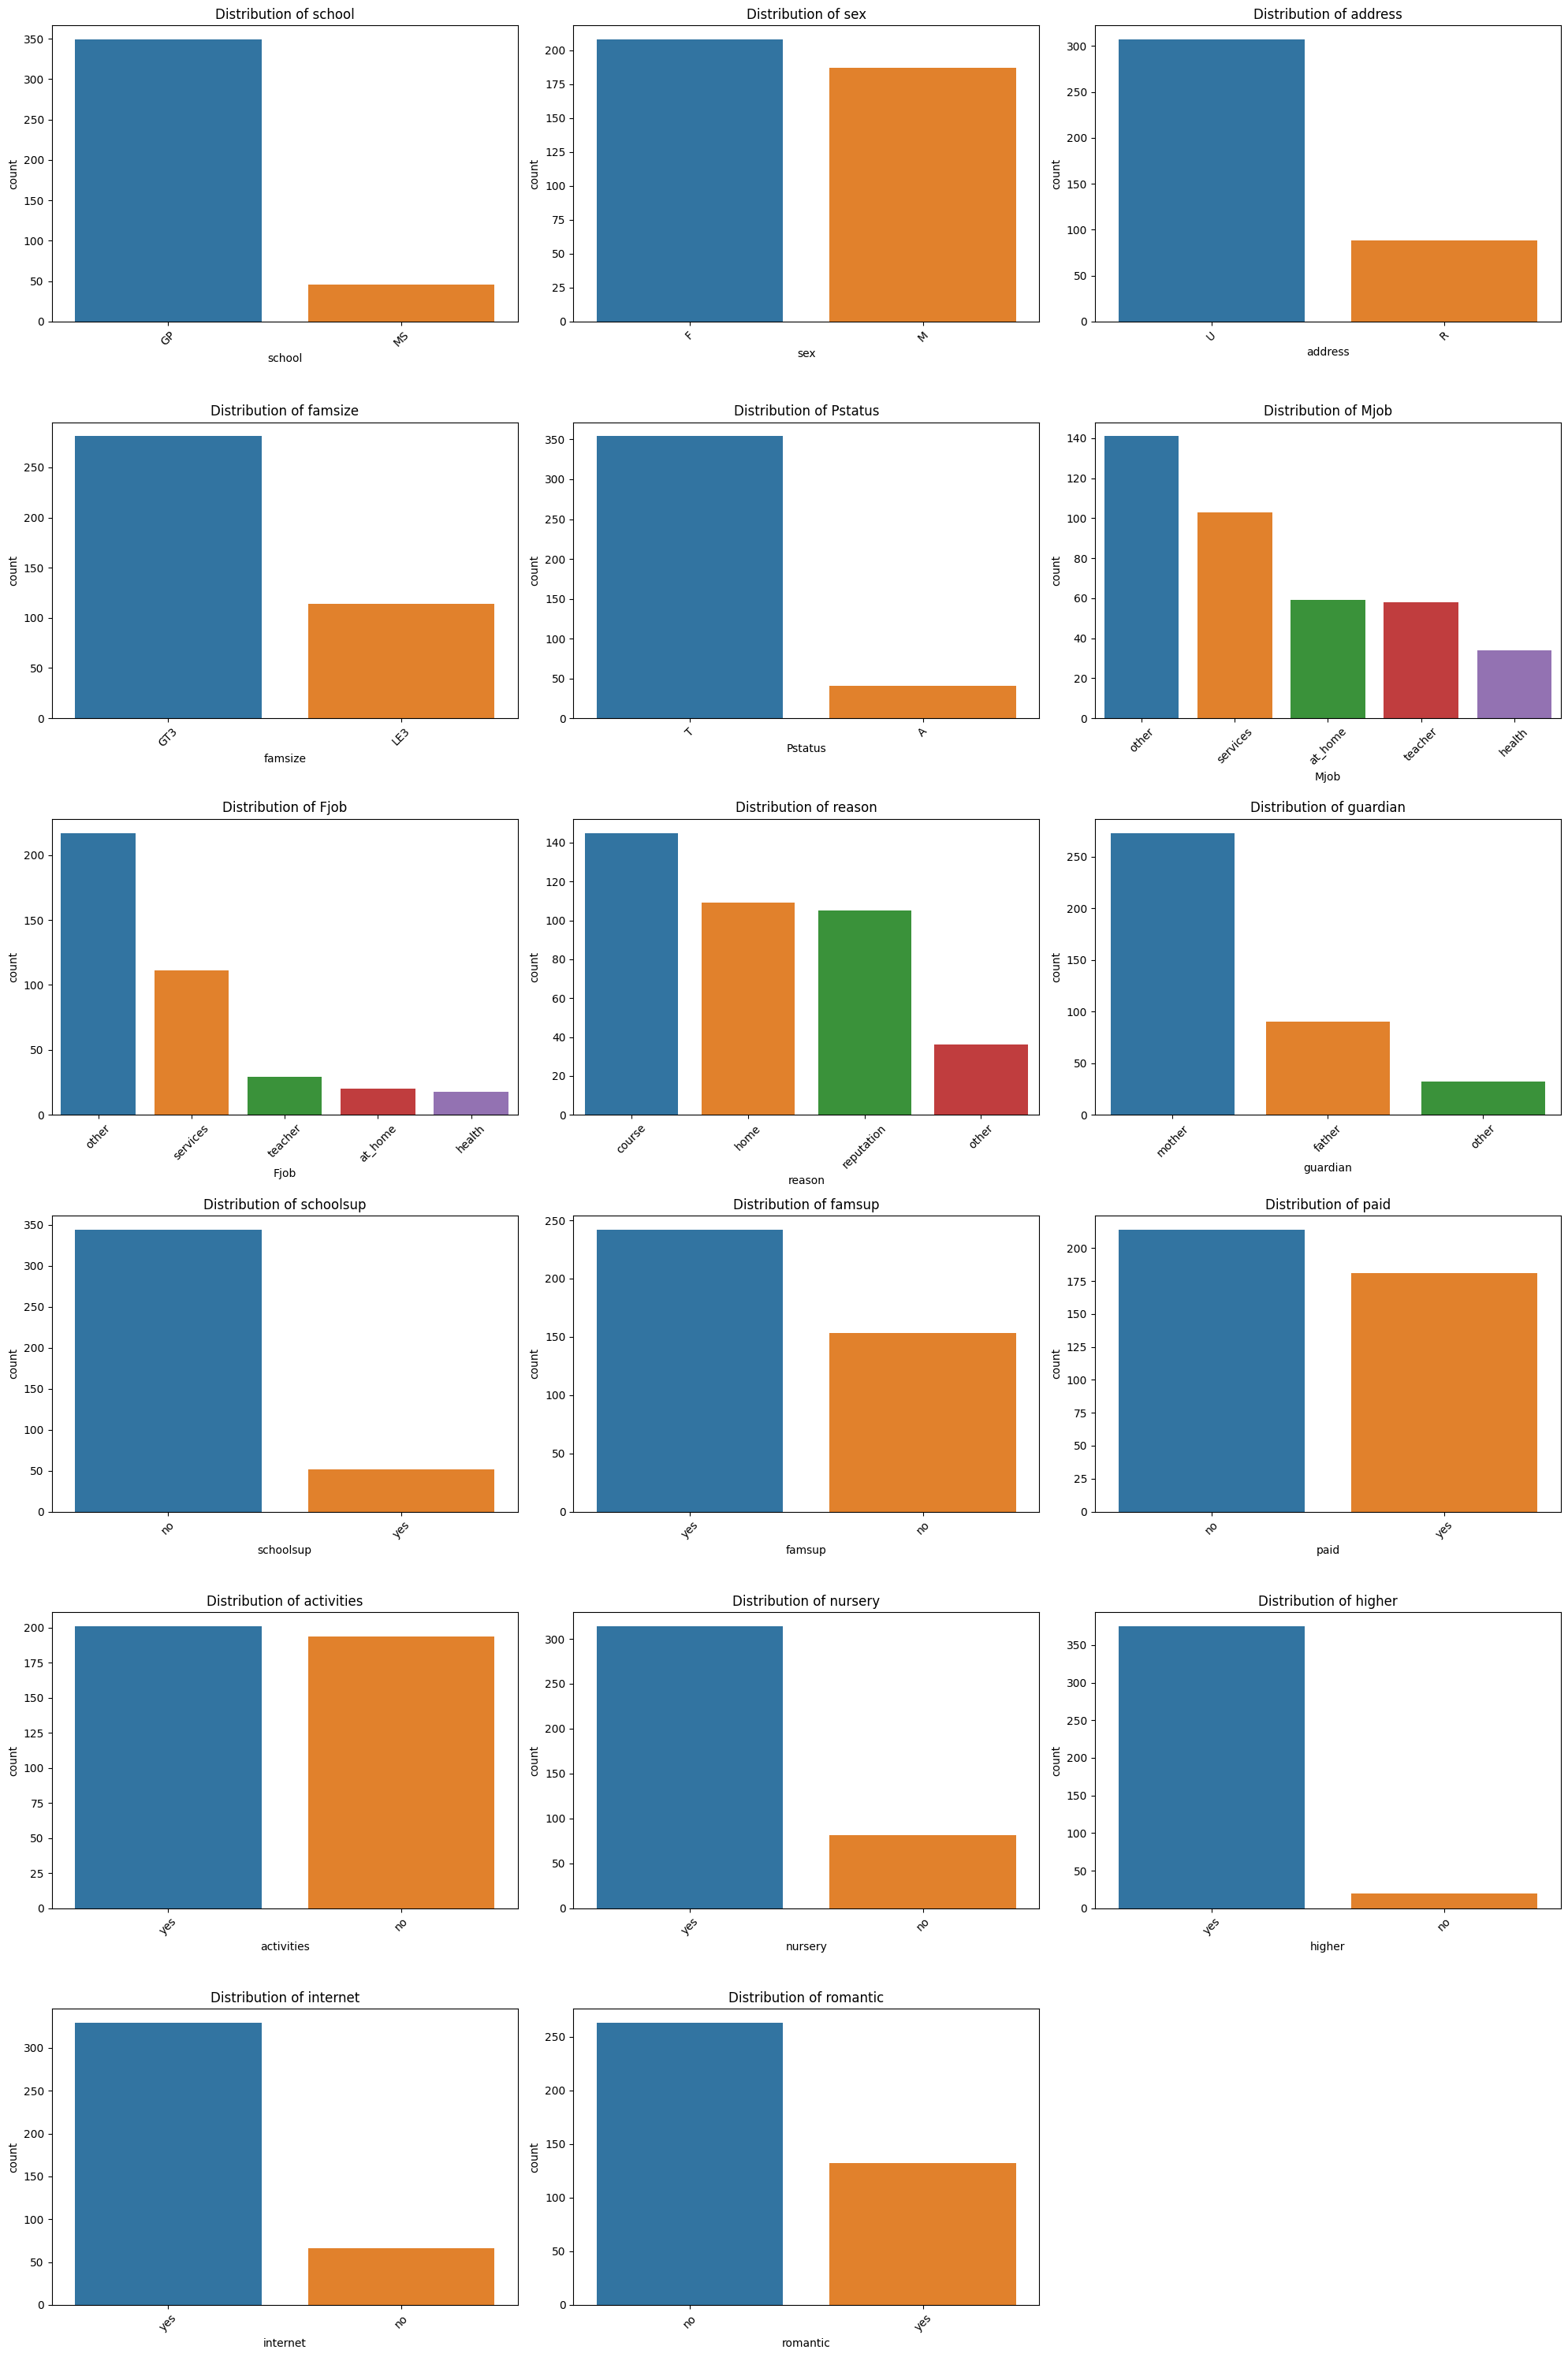

In [8]:
object_cols = df.select_dtypes(include="object").columns.tolist()

# Limit to 10 features if there are more than 10
# if len(numeric_cols) > 10:
#     numeric_cols = numeric_cols[:10]

# Calculate the number of rows needed (3 plots per row)
n_rows = (len(object_cols) + 2) // 3  # Round up division

# Create subplots (3 per row)
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(object_cols):
    if df[col].nunique() < 20:  # Treat as discrete
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])
    else:  # Treat as continuous
        sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if total plots not multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

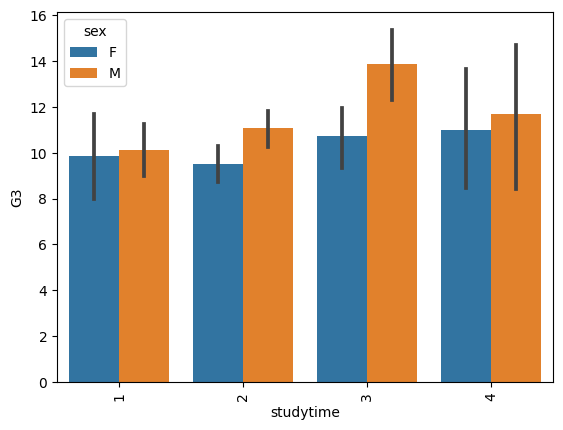

In [10]:
sns.barplot(x="studytime",y="G3",hue="sex",data=df)
plt.xticks(rotation=90)
plt.show()

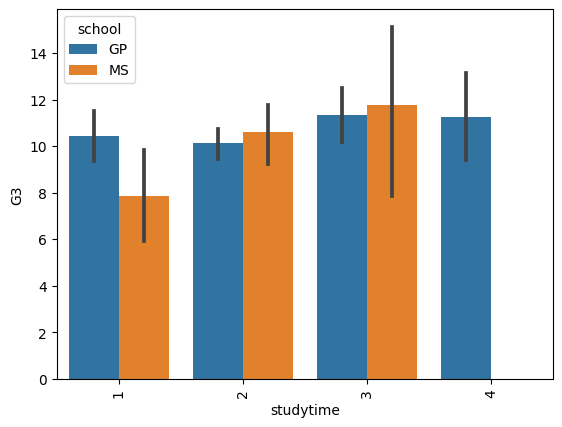

In [11]:
sns.barplot(x="studytime",y="G3",hue="school",data=df)
plt.xticks(rotation=90)
plt.show()

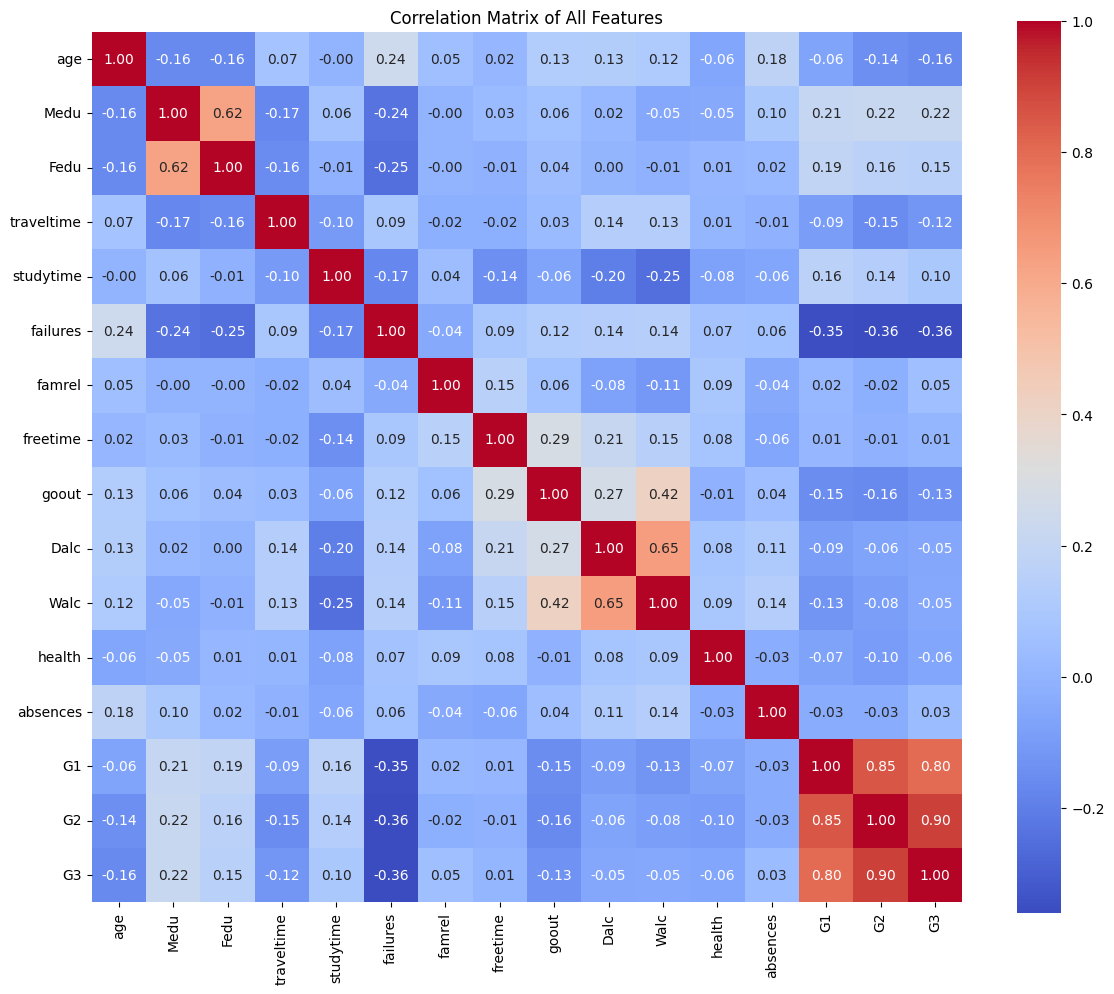

In [12]:
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

<Axes: xlabel='studytime', ylabel='G3'>

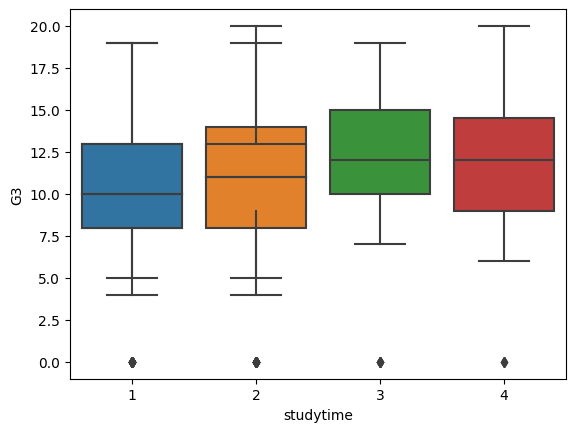

In [13]:
sns.boxplot(x='sex', y='G3', data=df)
sns.boxplot(x='studytime', y='G3', data=df)


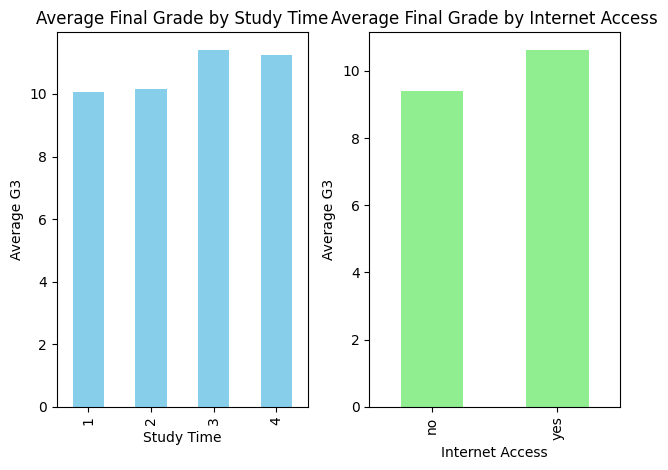

In [14]:
plt.subplot(1, 2, 1)  
df.groupby('studytime')['G3'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Final Grade by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Average G3')

# Second subplot: internet access vs G3
plt.subplot(1, 2, 2)  
df.groupby('internet')['G3'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Final Grade by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Average G3')

plt.tight_layout()
plt.show()


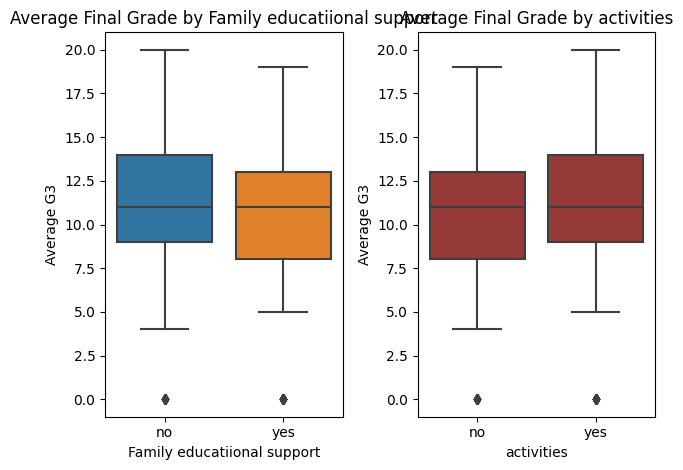

In [15]:
plt.subplot(1, 2, 1)  
sns.boxplot(x='famsup', y='G3', data=df)
plt.title('Average Final Grade by Family educatiional support')
plt.xlabel('Family educatiional support')
plt.ylabel('Average G3')


plt.subplot(1, 2, 2)  
sns.boxplot(x='activities', y='G3', data=df,color="brown")
plt.title('Average Final Grade by activities')
plt.xlabel('activities')
plt.ylabel('Average G3')

plt.tight_layout()
plt.show()




## 🏗️Feature-Engineering

In [16]:
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
df["romantic"].value_counts()

romantic
0    263
1    132
Name: count, dtype: int64

In [18]:
df['parent_edu_avg'] = (df['Medu'] + df['Fedu']) / 2
df['alc_score'] = df['Dalc'] + df['Walc']
df['study_pressure'] = df['studytime'] / (df['goout'] + 1)
df['at_risk'] = (df['failures'] > 0) | (df['absences'] > 10)
df['high_parent_edu'] = (df['parent_edu_avg'] >= 3).astype(int)
df['study_social_ratio'] = df['studytime'] / (df['goout'] + 1)

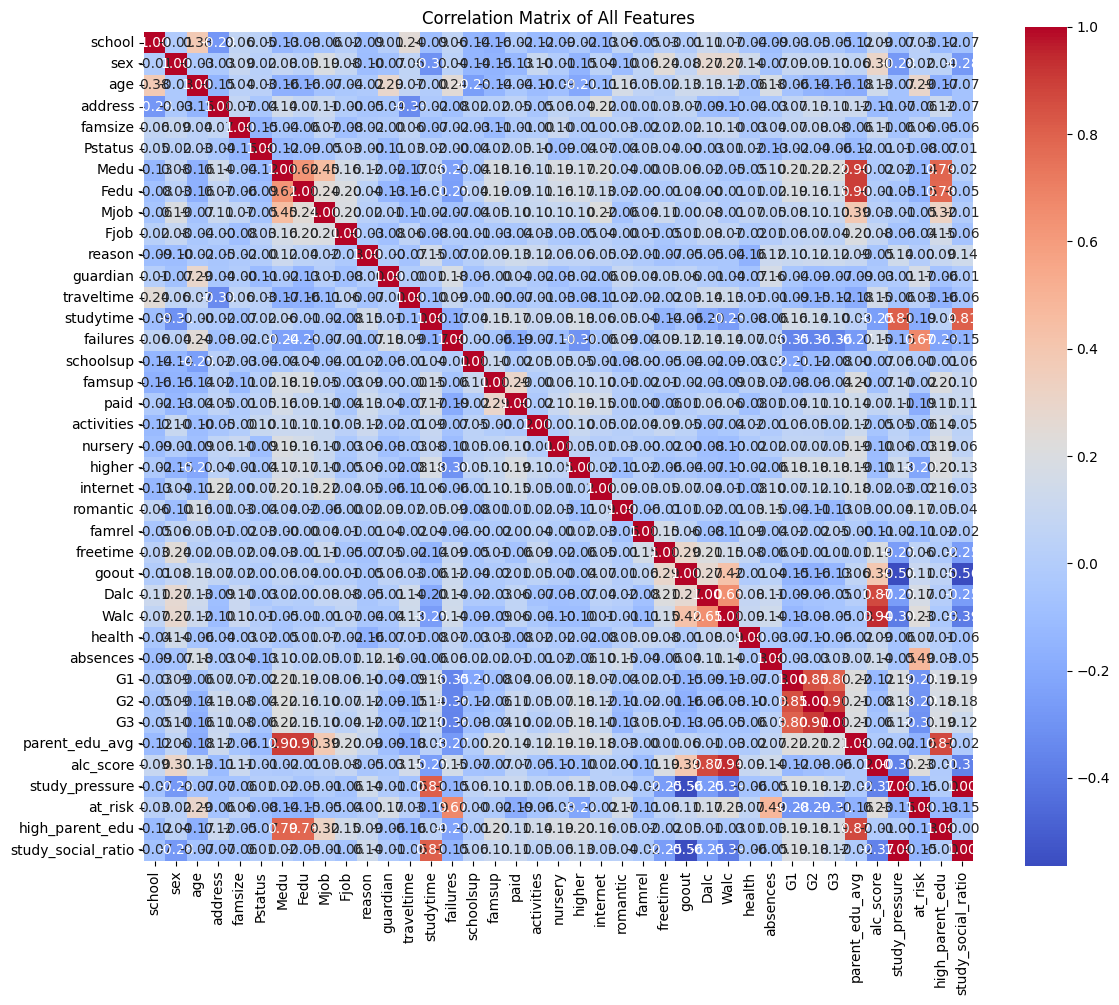

In [19]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

In [20]:
# Compute correlation of all numeric features with G3
correlation_with_g3 = df.corr()['G3'].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_g3)


G3                    1.000000
G2                    0.904868
G1                    0.801468
Medu                  0.217147
parent_edu_avg        0.205224
high_parent_edu       0.192933
higher                0.182465
Fedu                  0.152457
study_social_ratio    0.122915
study_pressure        0.122915
reason                0.121994
address               0.105756
sex                   0.103456
Mjob                  0.102082
paid                  0.101996
internet              0.098483
studytime             0.097820
famsize               0.081407
nursery               0.051568
famrel                0.051363
Fjob                  0.042286
absences              0.034247
activities            0.016100
freetime              0.011307
famsup               -0.039157
school               -0.045017
Walc                 -0.051939
Dalc                 -0.054660
Pstatus              -0.058009
alc_score            -0.058245
health               -0.061335
guardian             -0.070109
schoolsu

In [21]:
deleted_cols = [
    "G1", "G2", "Dalc", "Mjob", "Fjob", "famsize", "famsup", "nursery",
    "famrel", "schoolsup", "Pstatus", "Walc", "health_absence"
]
for i in df :
    if i in deleted_cols:
        df.drop([i], axis=1, inplace=True)

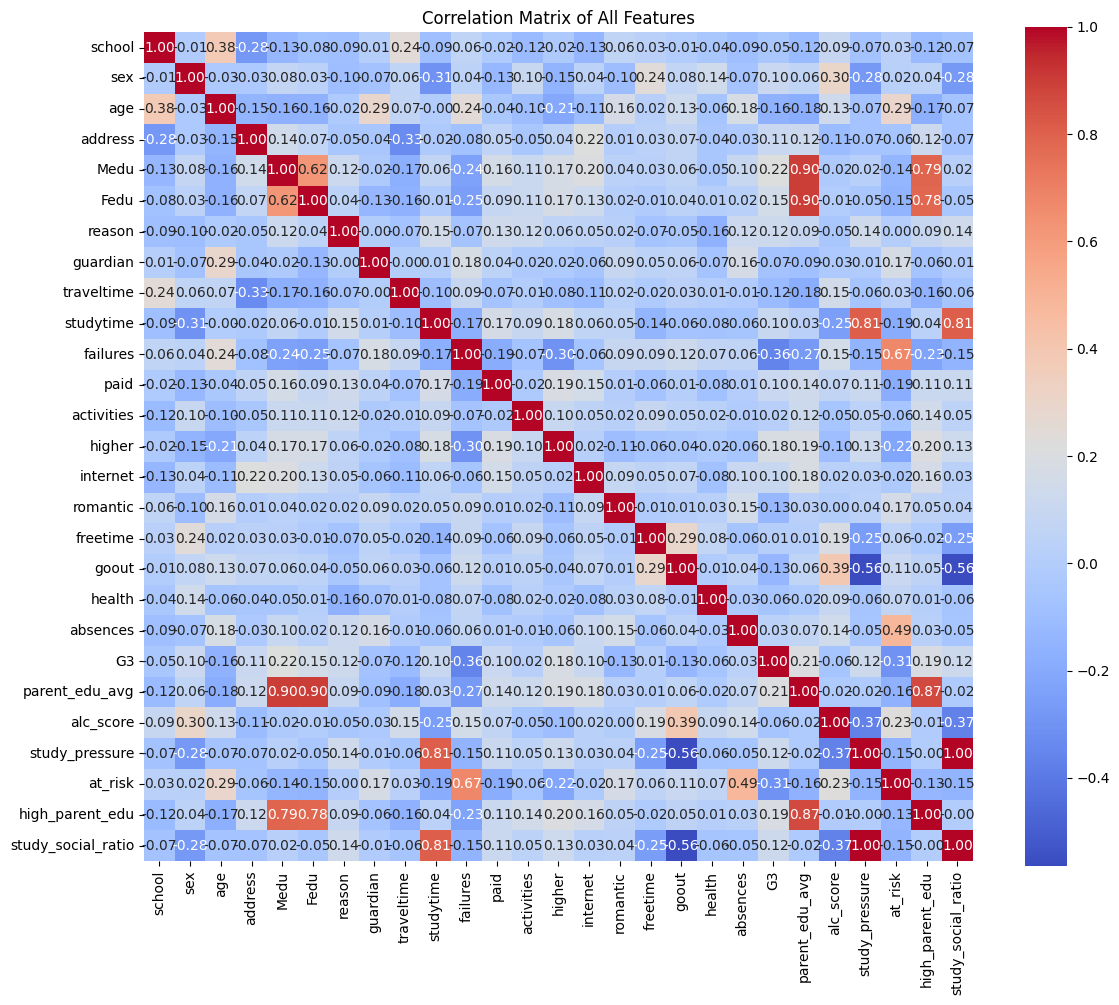

In [22]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

In [23]:
numeric_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [24]:
object_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

## 🤖Model-Building

## 🔍 Regression Analysis

As instructed, I implemented both **Linear Regression** and **Polynomial Regression** models. However, after exploring the dataset, I realized that it contains only around **400 rows**, which makes regression a less optimal choice for such a small dataset.

To address this, I also experimented with other regression models including:

- **Random Forest Regressor**
- **XGBoost Regressor**

While these models showed some improvement, the limited data still posed challenges. I considered using **SMOTE (Synthetic Minority Over-sampling Technique)** to generate synthetic samples, which I had applied successfully in previous tasks. However, in this case, although it slightly improved accuracy, **it may not generalize well in real-world scenarios**, making it less suitable for this regression task because the data is small and I prefer to use SMOTE with imabalance data usually recives Good results.

---




In [25]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop(columns=['G3'])
y = df['G3']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_linear = linear_model.predict(X_test)

# Evaluate
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [27]:
print("🔹 Linear Regression:")
print(f"   MSE: {mse_linear:.4f}")
print(f"   R² Score: {r2_linear:.4f}")

🔹 Linear Regression:
   MSE: 17.5280
   R² Score: 0.1452


In [28]:
from sklearn.preprocessing import PolynomialFeatures

for deg in [2, 3,4]:
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Degree {deg}: MSE = {mse:.4f}, R² = {r2:.4f}")

Degree 2: MSE = 1661.8075, R² = -80.0438
Degree 3: MSE = 114.1640, R² = -4.5676
Degree 4: MSE = 249.8387, R² = -11.1843


## 📊Evaluation

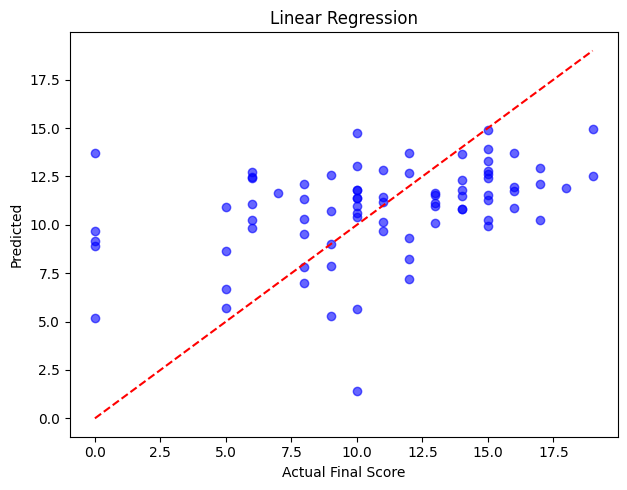

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted")
plt.title("Linear Regression")

plt.tight_layout()
plt.show()


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_test)

# Evaluate
print("✅ R² score:", r2_score(y_test, y_pred))
print("📉 RMSE:", mean_squared_error(y_test, y_pred))

✅ R² score: 0.2260105069859033
📉 RMSE: 15.870691139240506


## ✅ Classification Approach

To improve model performance, I reframed the problem as a **binary classification** task:

- Samples with a value **less than 10** were labeled as **"Failed"**
- All other samples were labeled as **"Passed"**

This transformation resulted in significantly better performance, especially with classification models. The binary nature of the task made it more suitable for the dataset size and characteristics.

In [31]:
numeric_cols = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
    'goout', 'parent_edu_avg', 'alc_score', 'study_social_ratio'
]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [32]:
df["G3"].value_counts()

G3
10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64

In [33]:
df['target'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)
# df['target'] = df['G3'].apply(lambda x: 0 if x < 12 else 1)

In [34]:
df.drop(["G3"],axis=1 , inplace=True)

In [35]:
df.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'paid', 'activities', 'higher',
       'internet', 'romantic', 'freetime', 'goout', 'health', 'absences',
       'parent_edu_avg', 'alc_score', 'study_pressure', 'at_risk',
       'high_parent_edu', 'study_social_ratio', 'target'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop(columns=["target"])
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 9 18]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.64      0.33      0.44        27
           1       0.72      0.90      0.80        52

    accuracy                           0.71        79
   macro avg       0.68      0.62      0.62        79
weighted avg       0.70      0.71      0.68        79



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(
    loss="log_loss",      # for logistic regression
    learning_rate="constant",
    eta0=0.01,            # learning rate
    max_iter=1000,        # epochs
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10 17]
 [ 3 49]]
              precision    recall  f1-score   support

           0       0.77      0.37      0.50        27
           1       0.74      0.94      0.83        52

    accuracy                           0.75        79
   macro avg       0.76      0.66      0.67        79
weighted avg       0.75      0.75      0.72        79



In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,  # number of trees
                                  max_depth=None,     # depth of each tree
                                  min_samples_split=2,
                                  random_state=42,
                                  n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[10 17]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.67      0.37      0.48        27
           1       0.73      0.90      0.81        52

    accuracy                           0.72        79
   macro avg       0.70      0.64      0.64        79
weighted avg       0.71      0.72      0.70        79



In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[11 16]
 [ 8 44]]
              precision    recall  f1-score   support

           0       0.58      0.41      0.48        27
           1       0.73      0.85      0.79        52

    accuracy                           0.70        79
   macro avg       0.66      0.63      0.63        79
weighted avg       0.68      0.70      0.68        79

